<a href="https://colab.research.google.com/github/Christina-26/Marvel-Level--2-Task/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
nyc_df = pd.read_csv("AB_NYC_2019.csv")


In [60]:
#using pandas library and 'read_csv' function to read BlackFriday csv file as file already formated for us from Kaggle
airbnb=pd.read_csv("/content/AB_NYC_2019.csv")
#examing head of BlackFriday csv file
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [61]:
#checking amount of rows in given dataset to understand the size we are working with
len(airbnb)
#checking type of every column in the dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [62]:
#after looking at the head of the dataset we already were able to notice some NaN values, therefore need to examine missing values further before continuing with analysis

#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
airbnb.isnull().sum()
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)
#examing the changes
airbnb.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [63]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [64]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [65]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(airbnb.neighbourhood.unique())

221

In [66]:
#examining the unique values of room_type as this column will appear very handy for later analysis
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [67]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [68]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

327

In [69]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


<ipython-input-70-b3758f3cd098>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette=pink_palette)
<ipython-input-70-b3758f3cd098>:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette=pink_palette)
<ipython-input-70-b3758f3cd098>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


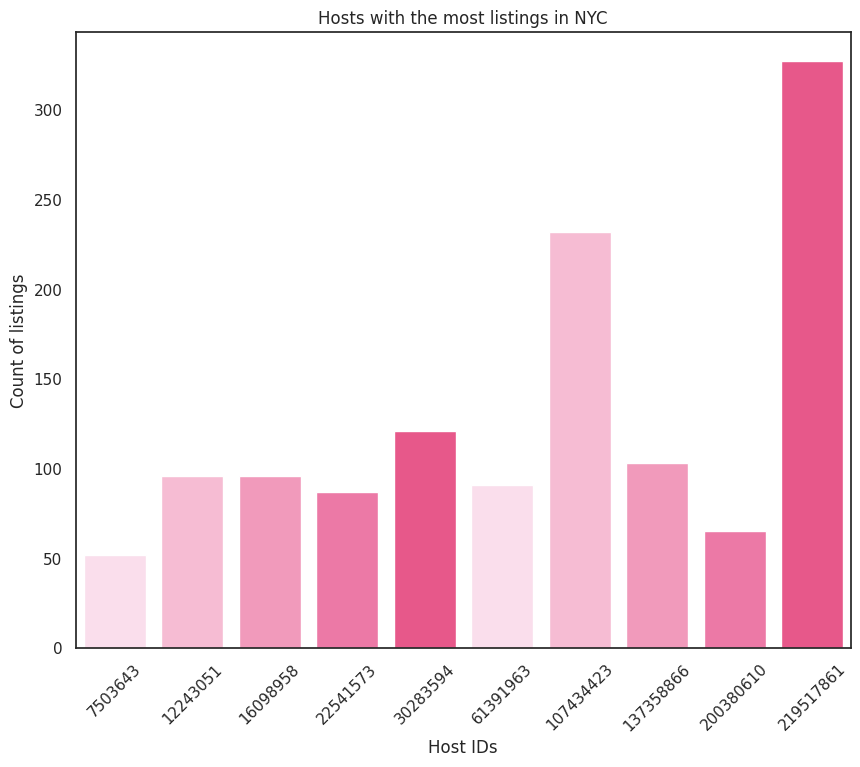

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom pink color palette
pink_palette = sns.color_palette(["#FFD9EC", "#FFB3D1", "#FF8CB7", "#FF66A2", "#FF4083"])

# Assuming top_host_df is your DataFrame
viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette=pink_palette)
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

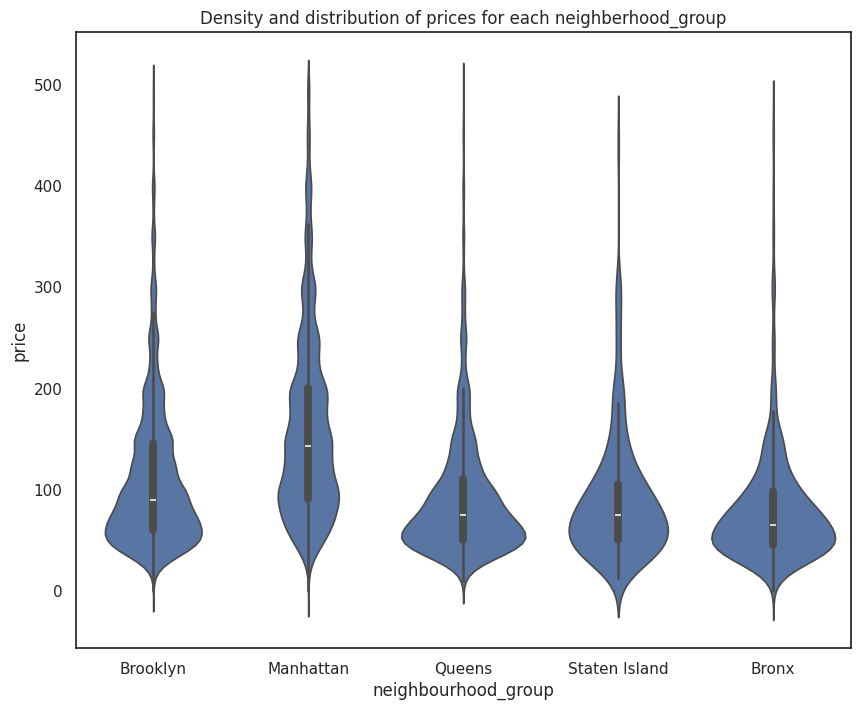

In [71]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price < 500]
#using violinplot to showcase density and distribtuion of prices
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

In [72]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

<ipython-input-73-116e37586330>:13: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  viz_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count', palette=pink_purple_palette)


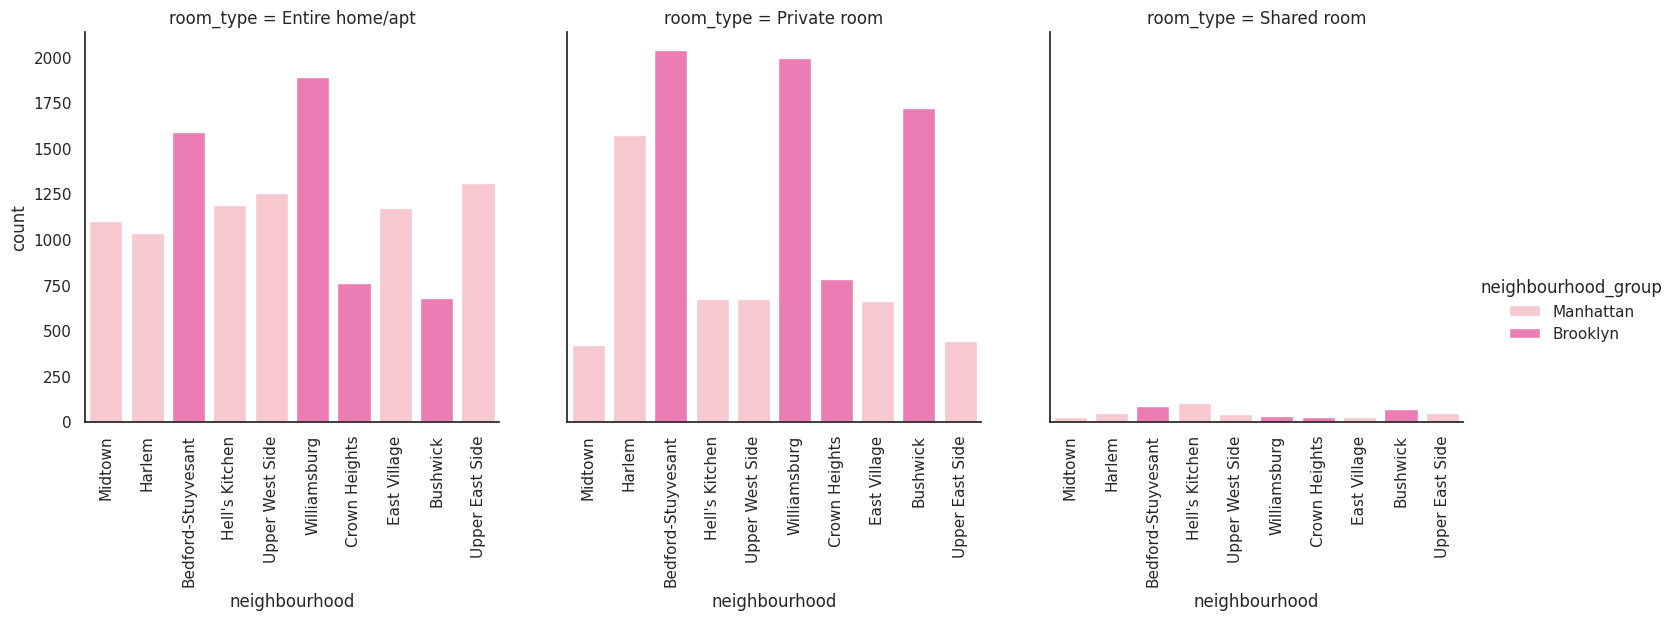

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom pink and purple color palette
pink_purple_palette = ["#FFC0CB", "#FF69B4", "#DB7093", "#BA55D3", "#9370DB", "#8A2BE2"]

# Grabbing top 10 neighbourhoods for sub-dataframe
sub_7 = airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
                                                 'Upper West Side', 'Hell\'s Kitchen', 'East Village',
                                                 'Upper East Side', 'Crown Heights', 'Midtown'])]

# Use catplot to represent multiple interesting attributes together and a count
viz_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count', palette=pink_purple_palette)
viz_3.set_xticklabels(rotation=90)

# Show the plot
plt.show()


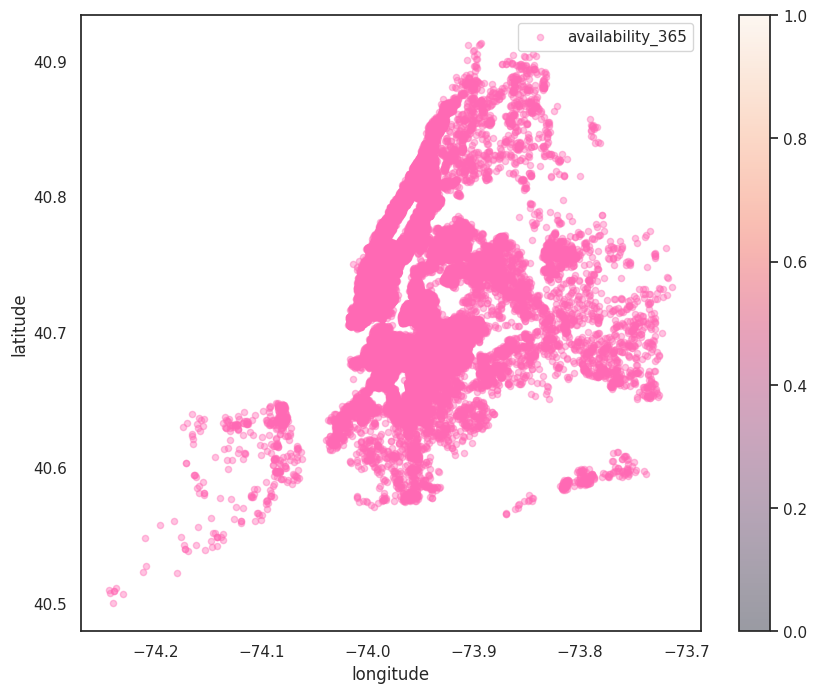

In [74]:
import matplotlib.pyplot as plt

# Create a scatterplot with a lighter middle pink color
viz_4 = sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='#FF69B4',
                   colorbar=True, alpha=0.4, figsize=(10, 8))
viz_4.legend()

# Show the plot
plt.show()


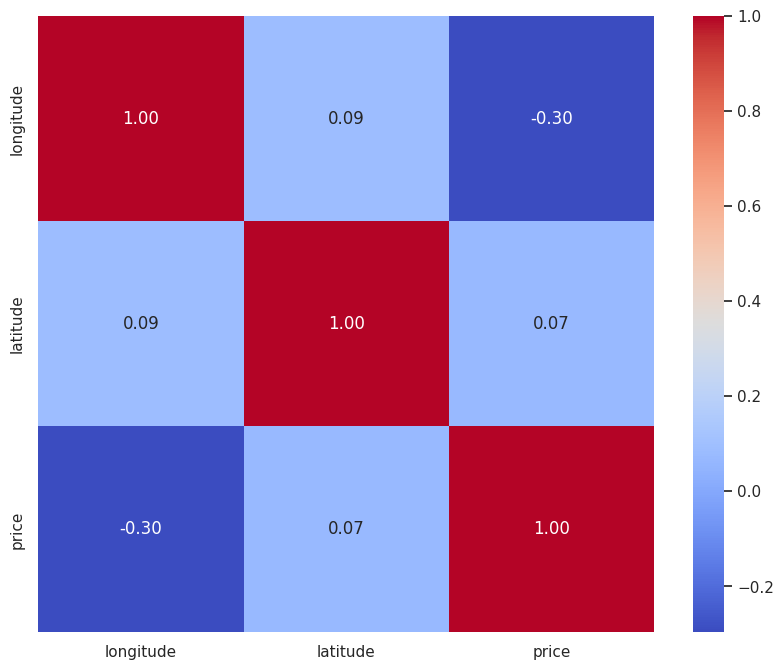

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import io

# Assuming you have the image file uploaded to Colab
image_path = '/content/New_York_City_.png'

# Load the NYC image
image = Image.open(image_path)

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the NYC image
plt.imshow(image, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

# Create a heatmap using seaborn
sns.heatmap(data=sub_6[['longitude', 'latitude', 'price']].corr(), annot=True, fmt=".2f", cmap="coolwarm")

# Display the plot
plt.show()


In [76]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [77]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4
